In [61]:
from PIL import Image
import numpy as np
import time
img = Image.open('overhead.png')
raw = np.array(img)

In [79]:
t = time.time()
for _ in range(1000):

    window = Image.fromarray(raw[:round(1080/3),:round(1920/3),:])
    window_224_224 = window.resize((224,224))
    
print((time.time()-t)/1000)

0.0035901386737823486


3.5 ms for image slice resize - not great, but we can live with that

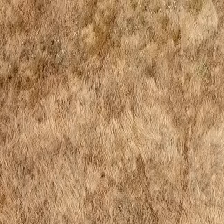

In [80]:
window_224_224

In [83]:
import math
math.floor

<function math.floor>

In [141]:
N = 3 # mean 3x3 grid
windows = []
y_step = math.floor(1080/3) 
x_step = math.floor(1920/3)

for y in range(N):
    for x in range(N):
        x_slice = slice(x*x_step,(x+1)*x_step-1)
        y_slice = slice(y*y_step,(y+1)*y_step-1)
        
        print(f'x: {x_slice}, y: {y_slice}')
        window = raw[y_slice, x_slice ,:]
        
        window = Image.fromarray(window)
        window_224_224 = window.resize((224,224))
        windows.append(window_224_224)

x: slice(0, 639, None), y: slice(0, 359, None)
x: slice(640, 1279, None), y: slice(0, 359, None)
x: slice(1280, 1919, None), y: slice(0, 359, None)
x: slice(0, 639, None), y: slice(360, 719, None)
x: slice(640, 1279, None), y: slice(360, 719, None)
x: slice(1280, 1919, None), y: slice(360, 719, None)
x: slice(0, 639, None), y: slice(720, 1079, None)
x: slice(640, 1279, None), y: slice(720, 1079, None)
x: slice(1280, 1919, None), y: slice(720, 1079, None)


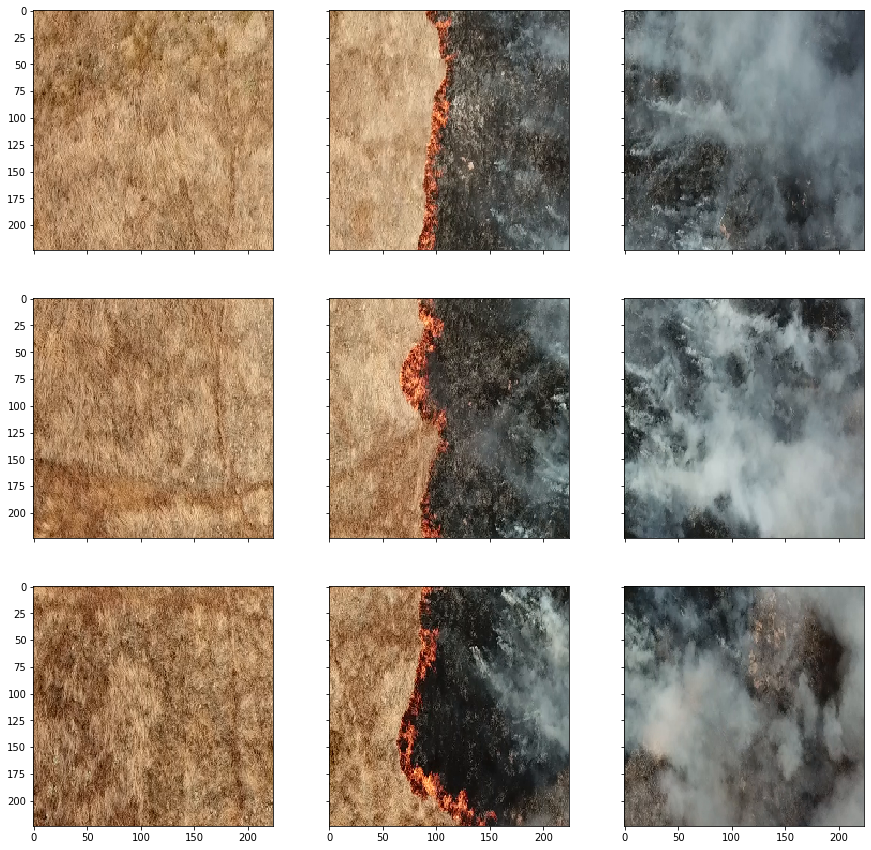

In [148]:
fig, _ = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15,15))

for i, ax in enumerate(fig.get_axes()):
    ax.imshow(windows[i])
    
plt.show()